# Example 4.18

Use finite differences to solve the total head field for the seepage problem shown in the figure below.

## Data:

Geometry and soil properties from figure

## Principles:

$\cfrac{\partial^2 h}{\partial x^2}+\cfrac{\partial^2 h}{\partial y^2}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Next, let's define some variables:

nx = 50 # Number of grid points in the x direction
ny = 50 # Number of grid points in the y direction
xmin = 0 # Minimum x value
xmax = 1 # Maximum x value
ymin = 0 # Minimum y value
ymax = 1 # Maximum y value
dx = (xmax - xmin) / (nx - 1) # Grid spacing in the x direction
dy = (ymax - ymin) / (ny - 1) # Grid spacing in the y direction
x = np.linspace(xmin, xmax, nx) # x values
y = np.linspace(ymin, ymax, ny) # y values


In [6]:
# Now, let's set up the boundary conditions:

u = np.zeros((ny, nx)) # Initialize the solution array
u[0,:] = 0 # Boundary condition at y = ymin
u[ny-1,:] = 0 # Boundary condition at y = ymax
u[:,0] = 0 # Boundary condition at x = xmin
u[:,nx-1] = 1 # Boundary condition at x = xmax

In [7]:
# Next, let's set up the finite difference method:

for it in range(10000):
    un = u.copy()
    u[1:-1,1:-1] = ((un[1:-1,2:] + un[1:-1,:-2]) * dy**2 +
                    (un[2:,1:-1] + un[:-2,1:-1]) * dx**2) / (2 * (dx**2 + dy**2))


C:\Users\zamcr\AppData\Local\Temp/ipykernel_19212/3201202251.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


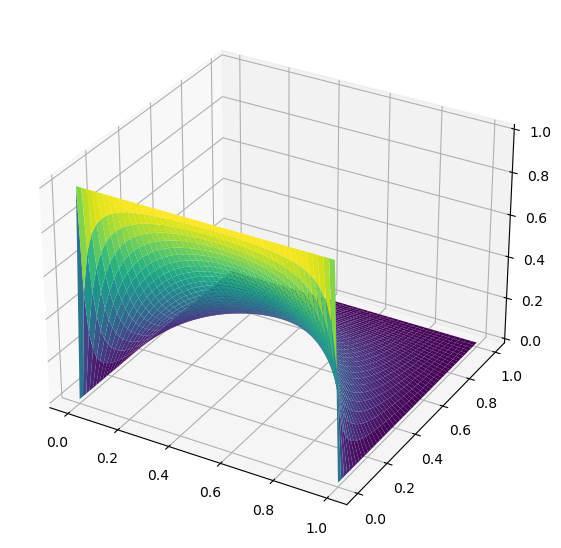

In [8]:
# Finally, let's plot the solution:

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap='viridis')
plt.show()
